In [1]:
#Mini max algorithm

In [3]:
import numpy as np
import random

class TicTacToe:
    def __init__(self, size):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)  # Initialize the game board as a 2D NumPy array of zeros
        self.moves = [str(i+1) for i in range(size*size)]  # Generate a list of available moves
    
    def get_board(self):
        return self.board  # Return the current state of the game board
        
    def make_move(self, player, position):
        if position == 'q':  # Check if the player wants to quit the game
            return False
        index = int(position) - 1  # Convert the input position to an index
        # Check if the move is valid
        if index < 0 or index >= len(self.moves) or self.board[index // self.size][index % self.size] != 0:
            return False
        self.board[index // self.size][index % self.size] = player  # Update the board with the player's move
        return True
    
    def check_winner(self):
        sums = np.concatenate([self.board.sum(axis=0),  # Calculate the sums of rows
                               self.board.sum(axis=1),  # Calculate the sums of columns
                               [np.trace(self.board), np.trace(np.fliplr(self.board))]])  # Calculate the sums of diagonals
        if self.size in sums:  # Check if player 1 wins
            return 1
        elif -self.size in sums:  # Check if player -1 wins
            return -1
        elif 0 not in self.board:  # Check if it's a draw
            return 0
        else:
            return None

def minimax(board, depth, is_maximizing):
    winner = board.check_winner()  # Check if there is a winner
    if winner is not None:  # If there is a winner, return the score
        return winner * depth
    
    if is_maximizing:
        best_score = -np.inf
        for i in range(board.size):
            for j in range(board.size):
                if board.board[i][j] == 0:  # If the cell is empty
                    board.board[i][j] = 1  # Make the move for player 1
                    score = minimax(board, depth + 1, False)  # Recursively call minimax for the opponent
                    board.board[i][j] = 0  # Undo the move
                    best_score = max(score, best_score)  # Update the best score
    else:
        best_score = np.inf
        for i in range(board.size):
            for j in range(board.size):
                if board.board[i][j] == 0:  # If the cell is empty
                    board.board[i][j] = -1  # Make the move for the opponent
                    score = minimax(board, depth + 1, True)  # Recursively call minimax for player 1
                    board.board[i][j] = 0  # Undo the move
                    best_score = min(score, best_score)  # Update the best score
    return best_score

def determine_move(board):
    best_score = -np.inf
    best_move = None
    for i in range(board.size):
        for j in range(board.size):
            if board.board[i][j] == 0:  # If the cell is empty
                board.board[i][j] = 1  # Make the move for player 1
                score = minimax(board, 0, False)  # Call minimax for the opponent
                board.board[i][j] = 0  # Undo the move
                if score > best_score:
                    best_score = score  # Update the best score
                    best_move = (i, j)  # Update the best move
    return best_move

def print_board(board):
    for row in board:
        print("|".join([str(cell) if cell != 0 else " " for cell in row]))  # Print the board with proper formatting
        print("-" * (2 * board.size - 1))  # Print horizontal lines between rows

def play_game():
    size = 3  # Size of the board
    game = TicTacToe(size)  # Initialize the game
    print("Welcome to Tic Tac Toe!")
    print("Player: X, Computer: O")
    while True:
        print("Current Board:")
        print_board(game.get_board())  # Print the current state of the board
        if game.check_winner() == 1:
            print("You win!")  # Print the winner
            break
        elif game.check_winner() == -1:
            print("Computer wins!")  # Print the winner
            break
        elif game.check_winner() == 0:
            print("It's a draw!")  # Print the result
            break
        move = input("Enter your move (1-9), or 'q' to quit: ")  # Prompt the player for a move
        if not game.make_move(1, move):  # Make the player's move
            if move == 'q':
                print("Quitting game.")  # Quit the game if the player chooses to
                break
            print("Invalid move. Please try again.")  # Prompt the player to enter a valid move
            continue
        print("Your move:")
        print_board(game.get_board())  # Print the current state of the board
        print("Computer's move:")
        move = determine_move(game)  # Determine the computer's move
        game.make_move(-1, move[0] * game.size + move[1] + 1)  # Make the computer's move
        print_board(game.get_board())  # Print the current state of the board

play_game()  # Start the game


Welcome to Tic Tac Toe!
Player: X, Computer: O
Current Board:
 | | 
-----------------
 | | 
-----------------
 | | 
-----------------


Enter your move (1-9), or 'q' to quit:  1


Your move:
1| | 
-----------------
 | | 
-----------------
 | | 
-----------------
Computer's move:
1| | 
-----------------
 |-1| 
-----------------
 | | 
-----------------
Current Board:
1| | 
-----------------
 |-1| 
-----------------
 | | 
-----------------


Enter your move (1-9), or 'q' to quit:  6


Your move:
1| | 
-----------------
 |-1|1
-----------------
 | | 
-----------------
Computer's move:
1| | 
-----------------
 |-1|1
-----------------
-1| | 
-----------------
Current Board:
1| | 
-----------------
 |-1|1
-----------------
-1| | 
-----------------


Enter your move (1-9), or 'q' to quit:  9


Your move:
1| | 
-----------------
 |-1|1
-----------------
-1| |1
-----------------
Computer's move:
1| |-1
-----------------
 |-1|1
-----------------
-1| |1
-----------------
Current Board:
1| |-1
-----------------
 |-1|1
-----------------
-1| |1
-----------------
Computer wins!


In [4]:
from math import inf as infinity  # Importing infinity for representing maximum and minimum values
from random import choice  # Importing choice to make random moves
import platform  # Importing platform module to clear screen based on OS
import time  # Importing time module for delays
from os import system  # Importing system function to clear the screen

HUMAN = -1  # Constant representing the human player
COMP = +1  # Constant representing the computer player
board = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
]  # Initial empty Tic Tac Toe board

def evaluate(state):
    # Evaluate the state of the game
    if wins(state, COMP):
        return +1  # If computer wins, return positive score
    elif wins(state, HUMAN):
        return -1  # If human wins, return negative score
    else:
        return 0  # If no one wins, return 0 (draw)

def wins(state, player):
    # Check if the player wins the game
    win_state = [
        [state[0][0], state[0][1], state[0][2]],
        [state[1][0], state[1][1], state[1][2]],
        [state[2][0], state[2][1], state[2][2]],
        [state[0][0], state[1][0], state[2][0]],
        [state[0][1], state[1][1], state[2][1]],
        [state[0][2], state[1][2], state[2][2]],
        [state[0][0], state[1][1], state[2][2]],
        [state[2][0], state[1][1], state[0][2]],
    ]  # Possible winning combinations
    return [player, player, player] in win_state  # Check if any combination matches

def game_over(state):
    # Check if the game is over (win/draw)
    return wins(state, HUMAN) or wins(state, COMP) or len(empty_cells(state)) == 0

def empty_cells(state):
    # Get the list of empty cells on the board
    cells = []
    for x, row in enumerate(state):
        for y, cell in enumerate(row):
            if cell == 0:
                cells.append([x, y])
    return cells

def valid_move(x, y):
    # Check if the move is valid
    return [x, y] in empty_cells(board)

def set_move(x, y, player):
    # Set the move on the board
    if valid_move(x, y):
        board[x][y] = player
        return True
    else:
        return False

def minimax(state, depth, player):
    # Minimax algorithm implementation
    if player == COMP:
        best = [-1, -1, -infinity]  # Initialize best move for computer
    else:
        best = [-1, -1, +infinity]  # Initialize best move for human

    if depth == 0 or game_over(state):
        score = evaluate(state)  # Evaluate score if max depth reached or game over
        return [-1, -1, score]

    for cell in empty_cells(state):
        x, y = cell[0], cell[1]
        state[x][y] = player
        score = minimax(state, depth - 1, -player)
        state[x][y] = 0
        score[0], score[1] = x, y

        if player == COMP:
            best = max(score, best, key=lambda x: x[2])  # Update best move for computer
        else:
            best = min(score, best, key=lambda x: x[2])  # Update best move for human

    return best

def clear_screen():
    # Clear screen based on OS
    os_name = platform.system().lower()
    if 'windows' in os_name:
        system('cls')
    else:
        system('clear')

def print_board(state, c_choice, h_choice):
    # Print the Tic Tac Toe board
    chars = {
        -1: h_choice,
        +1: c_choice,
        0: ' '
    }  # Characters representing players
    str_line = '---------------'  # Horizontal line
    print('\n' + str_line)
    for row in state:
        for cell in row:
            symbol = chars[cell]
            print(f'| {symbol} |', end='')  # Print cell content
        print('\n' + str_line)  # Print horizontal line after each row

def ai_turn(c_choice, h_choice):
    # Computer's turn
    depth = len(empty_cells(board))
    if depth == 0 or game_over(board):
        return

    clear_screen()
    print(f"Computer's turn [{c_choice}]")
    print_board(board, c_choice, h_choice)

    if depth == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
    else:
        move = minimax(board, depth, COMP)
        x, y = move[0], move[1]

    set_move(x, y, COMP)
    time.sleep(1)

def human_turn(c_choice, h_choice):
    # Human's turn
    depth = len(empty_cells(board))
    if depth == 0 or game_over(board):
        return

    moves = {
        1: [0, 0], 2: [0, 1], 3: [0, 2],
        4: [1, 0], 5: [1, 1], 6: [1, 2],
        7: [2, 0], 8: [2, 1], 9: [2, 2],
    }  # Mapping of input numbers to board coordinates

    clear_screen()
    print(f"Your turn [{h_choice}]")
    print_board(board, c_choice, h_choice)

    while True:
        try:
            move = int(input('Enter your move (1-9): '))
            coord = moves.get(move)
            if coord and set_move(*coord, HUMAN):
                break  # Exit loop if valid move made
            else:
                print('Invalid move. Please try again.')  # Print error message for invalid move
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()  # Exit program if user interrupts
        except (ValueError, TypeError):
            print('Invalid input. Please enter a number.')  # Print error message for invalid input

def main():
    clear_screen()
    h_choice = '' 
    c_choice = ''  
    first = '' 

    while h_choice not in ['O', 'X']:
        try:
            h_choice = input('Choose X or O\nYour Choice: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()

    c_choice = 'O' if h_choice == 'X' else 'X'  # Assign opposite choice for computer

    while first not in ['Y', 'N']:
        try:
            first = input('Do you want to start first?[y/n]: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()

    while len(empty_cells(board)) > 0 and not game_over(board):
        if first == 'N':
            ai_turn(c_choice, h_choice)
            first = ''

        human_turn(c_choice, h_choice)
        ai_turn(c_choice, h_choice)

    if wins(board, HUMAN):
        clear_screen()
        print(f"Your turn [{h_choice}]")
        print_board(board, c_choice, h_choice)
        print('Congratulations! You win!')
    elif wins(board, COMP):
        clear_screen()
        print(f"Computer's turn [{c_choice}]")
        print_board(board, c_choice, h_choice)
        print('Computer wins!')
    else:
        clear_screen()
        print_board(board, c_choice, h_choice)
        print('It\'s a draw!')

if __name__ == '__main__':
    main()


Choose X or O
Your Choice:  o
Do you want to start first?[y/n]:  y


Your turn [O]

---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------


Enter your move (1-9):  1


Computer's turn [X]

---------------
| O ||   ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
Your turn [O]

---------------
| O ||   ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------


Enter your move (1-9):  6


Computer's turn [X]

---------------
| O ||   ||   |
---------------
|   || X || O |
---------------
|   ||   ||   |
---------------
Your turn [O]

---------------
| O ||   ||   |
---------------
|   || X || O |
---------------
|   ||   || X |
---------------


Enter your move (1-9):  8


Computer's turn [X]

---------------
| O ||   ||   |
---------------
|   || X || O |
---------------
|   || O || X |
---------------
Your turn [O]

---------------
| O ||   ||   |
---------------
|   || X || O |
---------------
| X || O || X |
---------------


Enter your move (1-9):  3


Computer's turn [X]

---------------
| O ||   || O |
---------------
|   || X || O |
---------------
| X || O || X |
---------------
Your turn [O]

---------------
| O || X || O |
---------------
|   || X || O |
---------------
| X || O || X |
---------------


Enter your move (1-9):  4



---------------
| O || X || O |
---------------
| O || X || O |
---------------
| X || O || X |
---------------
It's a draw!


In [ ]:
#alpha beta pruning

In [5]:
from random import choice
from math import inf

board = [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]

def Gameboard(board):
    chars = {1: 'X', -1: 'O', 0: ' '}
    for x in board:
        for y in x:
            ch = chars[y]
            print(f'| {ch} |', end='')
        print('\n' + '---------------')
    print('===============')

def Clearboard(board):
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            board[x][y] = 0

def winningPlayer(board, player):
    conditions = [[board[0][0], board[0][1], board[0][2]],
                     [board[1][0], board[1][1], board[1][2]],
                     [board[2][0], board[2][1], board[2][2]],
                     [board[0][0], board[1][0], board[2][0]],
                     [board[0][1], board[1][1], board[2][1]],
                     [board[0][2], board[1][2], board[2][2]],
                     [board[0][0], board[1][1], board[2][2]],
                     [board[0][2], board[1][1], board[2][0]]]

    if [player, player, player] in conditions:
        return True

    return False

def gameWon(board):
    return winningPlayer(board, 1) or winningPlayer(board, -1)

def printResult(board):
    if winningPlayer(board, 1):
        print('X has won! ' + '\n')

    elif winningPlayer(board, -1):
        print('O\'s have won! ' + '\n')

    else:
        print('Draw' + '\n')

def blanks(board):
    blank = []
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            if board[x][y] == 0:
                blank.append([x, y])

    return blank

def boardFull(board):
    if len(blanks(board)) == 0:
        return True
    return False

def setMove(board, x, y, player):
    board[x][y] = player

def playerMove(board):
    e = True
    moves = {1: [0, 0], 2: [0, 1], 3: [0, 2],
             4: [1, 0], 5: [1, 1], 6: [1, 2],
             7: [2, 0], 8: [2, 1], 9: [2, 2]}
    while e:
        try:
            move = int(input('Enter a number between 1-9: '))
            if move < 1 or move > 9:
                print('Invalid Move! Try again!')
            elif not (moves[move] in blanks(board)):
                print('Invalid Move! Try again!')
            else:
                setMove(board, moves[move][0], moves[move][1], 1)
                Gameboard(board)
                e = False
        except(KeyError, ValueError):
            print('Enter a number!')

def getScore(board):
    if winningPlayer(board, 1):
        return 10

    elif winningPlayer(board, -1):
        return -10

    else:
        return 0

def abminimax(board, depth, alpha, beta, player):
    row = -1
    col = -1
    if depth == 0 or gameWon(board):
        return [row, col, getScore(board)]

    else:
        for cell in blanks(board):
            setMove(board, cell[0], cell[1], player)
            score = abminimax(board, depth - 1, alpha, beta, -player)
            if player == 1:
                # X is always the max player
                if score[2] > alpha:
                    alpha = score[2]
                    row = cell[0]
                    col = cell[1]

            else:
                if score[2] < beta:
                    beta = score[2]
                    row = cell[0]
                    col = cell[1]

            setMove(board, cell[0], cell[1], 0)

            if alpha >= beta:
                break

        if player == 1:
            return [row, col, alpha]

        else:
            return [row, col, beta]

def o_comp(board):
    if len(blanks(board)) == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
        setMove(board, x, y, -1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, -1)
        setMove(board, result[0], result[1], -1)
        Gameboard(board)

def x_comp(board):
    if len(blanks(board)) == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
        setMove(board, x, y, 1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, 1)
        setMove(board, result[0], result[1], 1)
        Gameboard(board)

def makeMove(board, player, mode):
    if mode == 1:
        if player == 1:
            playerMove(board)

        else:
            o_comp(board)
    else:
        if player == 1:
            o_comp(board)
        else:
            x_comp(board)

def pvc():
    while True:
        try:
            order = int(input('Enter to play 1st or 2nd: '))
            if not (order == 1 or order == 2):
                print('Please pick 1 or 2')
            else:
                break
        except(KeyError, ValueError):
            print('Enter a number')

    Clearboard(board)
    if order == 2:
        currentPlayer = -1
    else:
        currentPlayer = 1

    while not (boardFull(board) or gameWon(board)):
        makeMove(board, currentPlayer, 1)
        currentPlayer *= -1

    printResult(board)

# Driver Code

print("TIC-TAC-TOE using MINIMAX with ALPHA-BETA Pruning")
print("********")
pvc()

TIC-TAC-TOE using MINIMAX with ALPHA-BETA Pruning
********


Enter to play 1st or 2nd:  2


|   ||   ||   |
---------------
|   ||   ||   |
---------------
| O ||   ||   |
---------------


Enter a number between 1-9:  3


|   ||   || X |
---------------
|   ||   ||   |
---------------
| O ||   ||   |
---------------
| O ||   || X |
---------------
|   ||   ||   |
---------------
| O ||   ||   |
---------------


Enter a number between 1-9:  4


| O ||   || X |
---------------
| X ||   ||   |
---------------
| O ||   ||   |
---------------
| O ||   || X |
---------------
| X ||   ||   |
---------------
| O ||   || O |
---------------


Enter a number between 1-9:  2


| O || X || X |
---------------
| X ||   ||   |
---------------
| O ||   || O |
---------------
| O || X || X |
---------------
| X || O ||   |
---------------
| O ||   || O |
---------------
O's have won! 



In [6]:
from random import choice
from math import inf

board = [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]

def Gameboard(board):
    chars = {1: 'X', -1: 'O', 0: ' '}
    for x in board:
        for y in x:
            ch = chars[y]
            print(f'| {ch} |', end='')
        print('\n' + '---------------')
    print('===============')

def Clearboard(board):
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            board[x][y] = 0

def winningPlayer(board, player):
    conditions = [[board[0][0], board[0][1], board[0][2]],
                     [board[1][0], board[1][1], board[1][2]],
                     [board[2][0], board[2][1], board[2][2]],
                     [board[0][0], board[1][0], board[2][0]],
                     [board[0][1], board[1][1], board[2][1]],
                     [board[0][2], board[1][2], board[2][2]],
                     [board[0][0], board[1][1], board[2][2]],
                     [board[0][2], board[1][1], board[2][0]]]

    if [player, player, player] in conditions:
        return True

    return False

def gameWon(board):
    return winningPlayer(board, 1) or winningPlayer(board, -1)

def printResult(board):
    if winningPlayer(board, 1):
        print('X has won!, Min Max  ' + '\n')

    elif winningPlayer(board, -1):
        print('O\'s have won!, Alpha Beta Pruning  ' + '\n')

    else:
        print('Draw' + '\n')

def blanks(board):
    blank = []
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            if board[x][y] == 0:
                blank.append([x, y])

    return blank

def boardFull(board):
    if len(blanks(board)) == 0:
        return True
    return False

def setMove(board, x, y, player):
    board[x][y] = player

def playerMove(board):
    e = True
    moves = {1: [0, 0], 2: [0, 1], 3: [0, 2],
             4: [1, 0], 5: [1, 1], 6: [1, 2],
             7: [2, 0], 8: [2, 1], 9: [2, 2]}
    while e:
        try:
            move = int(input('Enter a number between 1-9: '))
            if move < 1 or move > 9:
                print('Invalid Move! Try again!')
            elif not (moves[move] in blanks(board)):
                print('Invalid Move! Try again!')
            else:
                setMove(board, moves[move][0], moves[move][1], 1)
                Gameboard(board)
                e = False
        except(KeyError, ValueError):
            print('Enter a number!')

def getScore(board):
    if winningPlayer(board, 1):
        return 10

    elif winningPlayer(board, -1):
        return -10

    else:
        return 0
    
def minimax(state, depth, player):
    if player == -1:
        best = [-1, -1, -10000000]
    else:
        best = [-1, -1, +10000000]

    if depth == 0 or gameWon(state):
        score = getScore(state)
        return [-1, -1, score]

    for cell in blanks(state):
        x, y = cell[0], cell[1]
        state[x][y] = player
        score = minimax(state, depth - 1, -player)
        state[x][y] = 0
        score[0], score[1] = x, y

        if player == -1:
            if score[2] > best[2]:
                best = score  # max value
        else:
            if score[2] < best[2]:
                best = score  # min value

    return best

def abminimax(board, depth, alpha, beta, player):
    row = -1
    col = -1
    if depth == 0 or gameWon(board):
        return [row, col, getScore(board)]

    else:
        for cell in blanks(board):
            setMove(board, cell[0], cell[1], player)
            score = abminimax(board, depth - 1, alpha, beta, -player)
            if player == 1:
                # X is always the max player
                if score[2] > alpha:
                    alpha = score[2]
                    row = cell[0]
                    col = cell[1]

            else:
                if score[2] < beta:
                    beta = score[2]
                    row = cell[0]
                    col = cell[1]

            setMove(board, cell[0], cell[1], 0)

            if alpha >= beta:
                break

        if player == 1:
            return [row, col, alpha]

        else:
            return [row, col, beta]

def o_comp(board):
    if len(blanks(board)) == 9:
        #x = choice([0, 1, 2])
        #y = choice([0, 1, 2])
        move = minimax(board, len(blanks(board)), +1)
        x, y = move[0], move[1]
        setMove(board, x, y, -1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, -1)
        setMove(board, result[0], result[1], -1)
        Gameboard(board)

def x_comp(board):
    if len(blanks(board)) == 9:
        #x = choice([0, 1, 2])
        #y = choice([0, 1, 2])
        move = minimax(board, len(blanks(board)), +1)
        x, y = move[0], move[1]
        setMove(board, x, y, 1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, 1)
        setMove(board, result[0], result[1], 1)
        Gameboard(board)

def makeMove(board, player, mode):
    if mode == 1:
        if player == 1:
            minimax(board,len(blanks(board)),player)

        else:
            o_comp(board)
    else:
        if player == 1:
            o_comp(board)
        else:
            x_comp(board)

def pvc():
    currentPlayer = 1

    while not (boardFull(board) or gameWon(board)):
        makeMove(board, currentPlayer, 1)
        currentPlayer *= -1
        makeMove(board, currentPlayer, -1)
        currentPlayer *= 1

    printResult(board)

# Driver Code
print("TIC-TAC-TOE using MINIMAX with MIN MAX OVER ALPHA-BETA Pruning")
print("********************")
pvc()  


TIC-TAC-TOE using MINIMAX with MIN MAX OVER ALPHA-BETA Pruning
********************
|   ||   ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O ||   ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O || O ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O || O || X |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O || O || X |
---------------
|   || X ||   |
---------------
| O ||   ||   |
---------------
| O || O || X |
---------------
| O || X ||   |
---------------
| O ||   ||   |
---------------
O's have won!, Alpha Beta Pruning  



In [ ]:
#Q learning agent

In [ ]:
import numpy as np
import random

class TicTacToe:

    def __init__(self):
        self.reset()

    def render(self):
        line = '\n-----------\n'
        row = " {} | {} | {}"
        print((row + line + row + line + row).format(*self.state))
        print(self.info)
    def step(self, action):
        if action in self.action_space:
            self.state[action] = self.cur_player
            self.action_space.remove(action)
            self.check_end()
            if self.is_end:
                if self.is_win:
                    self.info = 'Player {} wins!'.format(self.cur_player)
                else:
                    self.info = 'It\'s a draw!'
            else:
                self.info = 'Player {}\'s turn'.format(self.cur_player)
            return (self.state, self.is_win, self.is_end, self.info)
        else:
        # Handle case where action is not in action space
            print('Invalid action:', action)
            return (self.state, False, False, 'Invalid action')
    

        




    def reset(self, X=None, O=None):
        self.state = [' '] * 9
        self.action_space = list(range(9))
        self.is_end = False
        self.is_win = False
        self.info = 'New game'
        self.playerX = X
        self.playerO = O
        self.cur_player = random.choice(['O','X'])
        return (self.state, self.is_win, self.is_end, self.info)

    def player_turn(self):
        while True:
            if self.cur_player == 'O':
                cur = self.playerO
                oth = self.playerX
            else:
                cur = self.playerX
                oth = self.playerO
            
            self.info = 'Player {}\'s turn'.format(self.cur_player) 
            yield (cur, oth)
            
            self.cur_player = 'OX'.replace(self.cur_player, '')

    def check_end(self):
        for a, b, c in [(0,1,2), (3,4,5), (6,7,8),
                        (0,3,6), (1,4,7), (2,5,8),
                        (0,4,8), (2,4,6)]:
            if self.cur_player == self.state[a] == self.state[b] == self.state[c]:
                self.is_win = True
                self.is_end = True
                return

        if not any([s == ' ' for s in self.state]):
            self.is_win = False
            self.is_end = True
            return

class RandomPlayer:
    def __init__(self):
        self.name = 'Random'
        self.win_count = 0

    def action(self, state, actions):
        return random.choice(actions)

    def reward(self, reward, state):
        if reward == 1:
            self.win_count += 1

    def episode_end(self, episode):
        pass

class QLearningPlayer:
    def __init__(self):
        self.name = 'Q-Learning'
        self.q = {}
        self.init_q = 1.0
        self.learning_rate = 0.3
        self.discount_factor = 0.9
        self.exploration_rate = 1.0
        self.max_exploration_rate = 1.0
        self.min_exploration_rate = 0.01
        self.exploration_decay_rate = 0.01
        self.action_count = 9
        self.win_count = 0

        self.last_state = (' ',) * 9
        self.last_action = -1

    def action(self, state, actions):
        state = tuple(state)
        self.last_state = state

        if random.uniform(0, 1) > self.exploration_rate or state not in self.q:
            if state in self.q:
                action = np.argmax(self.q[state])
            else:
                action = random.choice(actions)
        else:
            action = random.choice(actions)

        self.last_action = action
        return action

    def reward(self, reward, state):
        if self.last_action >= 0:
            if reward == 1:
                self.win_count += 1

            state = tuple(state)
            if state in self.q:
                q_value = self.q[state][self.last_action]
            else:
                q_value = self.init_q

            max_future_q = np.max(self.q.get(state, [self.init_q] * self.action_count))
            new_q = q_value + self.learning_rate * (reward + self.discount_factor * max_future_q - q_value)
            self.q[state] = self.q.get(state, [self.init_q] * self.action_count)
            self.q[state][self.last_action] = new_q

    def episode_end(self, episode):
        self.exploration_rate = self.min_exploration_rate + \
            (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate * episode)

    def print_q(self):
        for k, v in self.q.items():
            print(k, v)

class HumanPlayer:
    def __init__(self):
        self.name = 'Human'

    def action(self, state, actions):
        while True:
            try:
                action = int(input('Your move (1-9): ')) - 1
                if action in actions:
                    return action
                else:
                    print('Invalid move. Please try again.')
            except ValueError:
                print('Invalid input. Please enter a number.')

    def reward(self, reward, state):
        pass

    def episode_end(self, episode):
        pass

def train(trails_num, p1, p2, env):
    for episode in range(trails_num):
        
        state, win, done, info = env.reset(X=p1, O=p2)

        for (cur_player, oth_player) in env.player_turn():
            action = cur_player.action(state, env.action_space)
            state, win, done, info = env.step(action)

            if done:
                if win:
                    cur_player.reward(1, state)
                    oth_player.reward(-1, state)
                else:
                    cur_player.reward(0.5, state)
                    oth_player.reward(0.5, state)
                break
            else:
                oth_player.reward(0, state)
        
        env.playerX.episode_end(episode)
        env.playerO.episode_end(episode)
    
    print('=' * 20)
    print('Train result - %d episodes' % trails_num)
    print('{} win rate: {:.2f}%'.format(p1.name, p1.win_count / trails_num * 100))
    print('{} win rate: {:.2f}%'.format(p2.name, p2.win_count / trails_num * 100))
    print('Draw rate: {:.2f}%'.format((trails_num - p1.win_count - p2.win_count) / trails_num * 100))
    print('=' * 20)


def play(p1, p2, env):
    while True:
        state, win, done, info = env.reset(X=p1, O=p2)
        for (cp, op) in env.player_turn():
            print()
            env.render()
            action = cp.action(state, env.action_space)
            state, win, done, info = env.step(action)
            if done:
                env.render()
                break

if __name__ == '__main__':
    env = TicTacToe()
    p1 = QLearningPlayer()
    p2 = RandomPlayer()
    p3 = HumanPlayer()

    train(1000, p1, p2, env)

    print('\nHuman play:\n')
    play(p1, p3, env)


In [ ]:
#Game

In [7]:
import numpy as np
import pickle

#State Represenation
class State:
    def __init__(self,player1, player2,rows = 3, columns = 3):
        self.rows = rows
        self.columns = columns
        self.board = np.zeros((self.rows, self.columns))                
        self.board_array = None
        self.player1 = player1
        self.player2 = player2
        self.done = False
        
        #The first player will be represented as 1 and Player 2 will have -1 representation
        
        self.player_mark = 1
        
    
    
    def showBoard(self):
        for i in range(self.rows):
            print('-------------')
            out = '| '
            for j in range(0, self.columns):
                if self.board[i, j] == 1:
                    token = 'x'
                if self.board[i, j] == -1:
                    token = 'o'
                if self.board[i, j] == 0:
                    token = ' '
                out += token + ' | '
            print(out)
        print('-------------')
    
    def convertBoardToArray(self):
        self.board_array = str(self.board.reshape(self.rows * self.columns))
        return self.board_array
    def Tie(self):
        if (len(self.availablePosition())) == 0:
            self.done = True
            return 0
        
    def ToggleSymbol(self):
        self.player_mark = -self.player_mark
    
    def updateState(self, position):
        self.board[position] = self.player_mark
        if self.player_mark == 1:
            self.player_mark = -1
        else:
            self.player_mark = 1
    
    def reward(self):
        win = self.Win()
        if win == 1:
            self.player1.giveReward(1)
            self.player2.giveReward(-1)
        elif win == -1:
            self.player1.giveReward(-1)
            self.player2.giveReward(1)
        else:
            self.player1.giveReward(0.1)
            self.player2.giveReward(0.5)
    def train(self, number_of_rounds = 100000):
        for i in range(number_of_rounds):
            if i % 1000000 == 0:
                print("Round number:", i)
            while not self.done:
                if np.random.uniform(0,1) <= 0.1:
                    self.ToggleSymbol()
                else:
                    available_positions = self.availablePosition()
                    action1 = self.player1.selectAction(available_positions, self.board, self.player_mark)
                    self.updateState(action1)
                    boardArray = self.convertBoardToArray()
                    self.player1.addState(boardArray)
                    win = self.Win()
                    if win is not None:
                        self.reward()
                        self.player1.reset()
                        self.player2.reset()
                        self.reset()
                        break
                if np.random.uniform(0,1) <= 0.1:
                    self.ToggleSymbol()
                else:
                    available_positions = self.availablePosition()
                    action2 = self.player2.selectAction(available_positions, self.board, self.player_mark)
                    self.updateState(action2)
                    boardArray1 = self.convertBoardToArray()
                    self.player2.addState(boardArray1)
                    win = self.Win()
                    if win is not None:
                        self.reward()
                        self.player1.reset()
                        self.player2.reset()
                        self.reset()
                        break
    def playwithHuman(self):
        while not self.done:
            available_positions = self.availablePosition()
            action1 = self.player1.selectAction(available_positions, self.board, self.player_mark)
            self.updateState(action1)
            boardArray = self.convertBoardToArray()
#             self.player1.addState(boardArray)
            self.showBoard()
            win = self.Win()
            if win is not None:
                if win == 1:
                    print(self.player1.name, "wins!")
                else:
                    print("tie!")
                self.reset()
                break
            else:
                available_positions = self.availablePosition()
                action2 = self.player2.selectAction(available_positions)
                self.updateState(action2)
                boardArray1 = self.convertBoardToArray()
#                 self.player2.addState(boardArray1)
                self.showBoard()
                win = self.Win()
                if win is not None:
                    if win == -1:
                        print(self.player2.name, "wins!")
                    else:
                        print("tie!")
                    self.reset()
                    break
    def reset(self):
        self.board = np.zeros((self.rows, self.columns))
        self.board_array = None
        self.done = False
        self.player_mark = 1

In [8]:
class Agent():
    def __init__(self,name,epsilon = 0.3,rows=3, columns=3):
        self.name = name
        self.rows = rows
        self.columns = columns
        self.alpha = 0.2
        self.gamma = 0.9
        self.epsilon = epsilon
        self.states_value = {}
        self.state_list = []
        self.sum_of_qvalues = []
        
    def convertBoardToArray(self, board):
        board_array = str(board.reshape(self.rows * self.columns))
        return board_array
    
    def addState(self, state):
        self.state_list.append(state)
    
    def selectAction(self,position_available, board, player_mark):
        if np.random.uniform(0,1) <= self.epsilon:
            index = np.random.choice(len(position_available))
            action = position_available[index]
        else:
            value_max = -999
            for p in position_available:
                next_board = board.copy()
                next_board[p] = player_mark
                next_board_Array = self.convertBoardToArray(next_board)
                if self.states_value.get(next_board_Array) is None:
                    value = 0
                else:
                    value = self.states_value.get(next_board_Array)
     
                if value >= value_max:
                    value_max = value
                    action = p
        return action
    
    def giveReward(self, reward):
        for i in reversed(self.state_list):
            if self.states_value.get(i) is None:
                self.states_value[i] = 0
            self.states_value[i] += self.alpha * (self.gamma * reward - self.states_value[i])
            reward = self.states_value[i]
        self.sum_of_qvalues.append(sum(self.states_value.values()))
        
    def reset(self):
        self.state_list = []
    
    def savePolicy(self):
        fw = open('policy_' + str(self.name), 'wb')
        pickle.dump(self.states_value, fw)
        fw.close()
    
    def loadPolicy(self, file):
        fr = open(file,'rb')
        self.states_value = pickle.load(fr)
        fr.close()

In [9]:
class Human:
    def __init__(self, name):
        self.name = name
    def selectAction(self,position):
        while True:
            r = int(input("Input your action row(range:0 to 2)"))
            c = int(input("Input your action column(range:0 to 2):"))
            action = (r,c)
            if action in position:
                return action
class State:
    def __init__(self, player1, player2):
        # Your initialization code here
        def availablePosition(self):
            pass
    def train(self, number_of_rounds):
        pass


p1 = Agent("p1")
st = State(p1, p1)
print("Training...")
st.train(1000000)

Training...


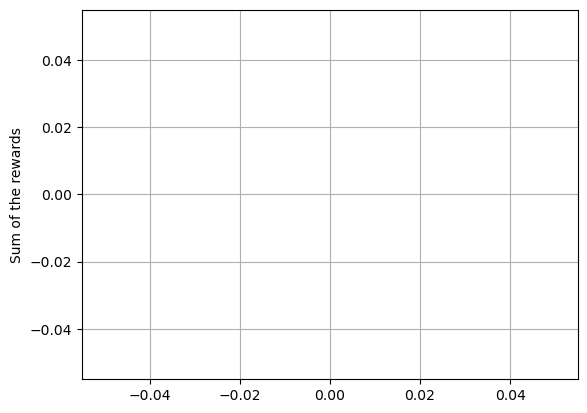

In [10]:
import matplotlib.pyplot as plt
plt.plot(p1.sum_of_qvalues)
plt.ylabel('Sum of the rewards')
plt.grid(True)
plt.savefig("Graph.png")
plt.show()
p1.savePolicy()
p1.loadPolicy("policy_p1")

In [11]:

class State:
    def __init__(self, player1, player2):
        # Your initialization code here
        self.player1 = player1
        self.player2 = player2

    def availablePosition(self):
        # Your logic to determine available positions goes here
        pass

    def train(self, number_of_rounds):
        # Your training logic goes here
        pass

    def playwithHuman(self):
        # Your logic for playing with a human goes here
        pass

p1 = Agent("computer", epsilon=0)
p1.loadPolicy("policy_p1")

p2 = Human("human")

st = State(p1, p2)
st.playwithHuman()

In [ ]:
import random


class TicTacToe:
    def __init__(self, playerX, playerO):
        self.board = [' ']*9
        self.playerX, self.playerO = playerX, playerO
        self.playerX_turn = random.choice([True, False])

    def play_game(self):
        self.playerX.start_game('X')
        self.playerO.start_game('O')
        while True: #yolo
            if self.playerX_turn:
                player, char, other_player = self.playerX, 'X', self.playerO
            else:
                player, char, other_player = self.playerO, 'O', self.playerX
            if player.breed == "human":
                self.display_board()
            space = player.move(self.board)
            if self.board[space-1] != ' ': # illegal move
                player.reward(-99, self.board) # score of shame
                break
            self.board[space-1] = char
            if self.player_wins(char):
                player.reward(1, self.board)
                other_player.reward(-1, self.board)
                break
            if self.board_full(): # tie game
                player.reward(0.5, self.board)
                other_player.reward(0.5, self.board)
                break
            other_player.reward(0, self.board)
            self.playerX_turn = not self.playerX_turn

    def player_wins(self, char):
        for a,b,c in [(0,1,2), (3,4,5), (6,7,8),
                      (0,3,6), (1,4,7), (2,5,8),
                      (0,4,8), (2,4,6)]:
            if char == self.board[a] == self.board[b] == self.board[c]:
                return True
        return False

    def board_full(self):
        return not any([space == ' ' for space in self.board])

    def display_board(self):
        row = " () | () | ()"
        hr = "\n-----------\n"
        print(row + hr + row + hr + row)#.format(*self.board)


class Player(object):
    def __init__(self):
        self.breed = "human"

    def start_game(self, char):
        print("\nNew game!")

    def move(self, board):
        return int(input("Your move? "))

    def reward(self, value, board):
        print("() rewarded: ()".format(self.breed, value))

    def available_moves(self, board):
        return [i+1 for i in range(0,9) if board[i] == ' ']


class RandomPlayer(Player):
    def __init__(self):
        self.breed = "random"

    def reward(self, value, board):
        pass

    def start_game(self, char):
        pass

    def move(self, board):
        return random.choice(self.available_moves(board))


class MinimaxPlayer(Player):
    def __init__(self):
        self.breed = "minimax"
        self.best_moves = {}

    def start_game(self, char):
        self.me = char
        self.enemy = self.other(char)

    def other(self, char):
        return 'O' if char == 'X' else 'X'

    def move(self, board):
        if tuple(board) in self.best_moves:
            return random.choice(self.best_moves[tuple(board)])
        if len(self.available_moves(board)) == 9:
            return random.choice([1,3,7,9])
        best_yet = -2
        choices = []
        for move in self.available_moves(board):
            board[move-1] = self.me
            optimal = self.minimax(board, self.enemy, -2, 2)
            board[move-1] = ' '
            if optimal > best_yet:
                choices = [move]
                best_yet = optimal
            elif optimal == best_yet:
                choices.append(move)
        self.best_moves[tuple(board)] = choices
        return random.choice(choices)

    def minimax(self, board, char, alpha, beta):
        if self.player_wins(self.me, board):
            return 1
        if self.player_wins(self.enemy, board):
            return -1
        if self.board_full(board):
            return 0
        for move in self.available_moves(board):
            board[move-1] = char
            val = self.minimax(board, self.other(char), alpha, beta)
            board[move-1] = ' '
            if char == self.me:
                if val > alpha:
                    alpha = val
                if alpha >= beta:
                    return beta
            else:
                if val < beta:
                    beta = val
                if beta <= alpha:
                    return alpha
        if char == self.me:
            return alpha
        else:
            return beta

    def player_wins(self, char, board):
        for a,b,c in [(0,1,2), (3,4,5), (6,7,8),
                      (0,3,6), (1,4,7), (2,5,8),
                      (0,4,8), (2,4,6)]:
            if char == board[a] == board[b] == board[c]:
                return True
        return False

    def board_full(self, board):
        return not any([space == ' ' for space in board])

    def reward(self, value, board):
        pass


class MinimuddledPlayer(MinimaxPlayer):
    def __init__(self, confusion=0.1):
        super(MinimuddledPlayer, self).__init__()
        self.breed = "muddled"
        self.confusion = confusion
        self.ideal_player = MinimaxPlayer()

    def start_game(self, char):
        self.ideal_player.me = char
        self.ideal_player.enemy = self.other(char)

    def move(self, board):
        if random.random() > self.confusion:
            return self.ideal_player.move(board)
        else:
            return random.choice(self.available_moves(board))


class QLearningPlayer(Player):
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9):
        self.breed = "Qlearner"
        self.harm_humans = False
        self.q = {} # (state, action) keys: Q values
        self.epsilon = epsilon # e-greedy chance of random exploration
        self.alpha = alpha # learning rate
        self.gamma = gamma # discount factor for future rewards

    def start_game(self, char):
        self.last_board = (' ',)*9
        self.last_move = None

    def getQ(self, state, action):
        # encourage exploration; "optimistic" 1.0 initial values
        if self.q.get((state, action)) is None:
            self.q[(state, action)] = 1.0
        return self.q.get((state, action))

    def move(self, board):
        self.last_board = tuple(board)
        actions = self.available_moves(board)

        if random.random() < self.epsilon: # explore!
            self.last_move = random.choice(actions)
            return self.last_move

        qs = [self.getQ(self.last_board, a) for a in actions]
        maxQ = max(qs)

        if qs.count(maxQ) > 1:
            # more than 1 best option; choose among them randomly
            best_options = [i for i in range(len(actions)) if qs[i] == maxQ]
            i = random.choice(best_options)
        else:
            i = qs.index(maxQ)

        self.last_move = actions[i]
        return actions[i]

    def reward(self, value, board):
        if self.last_move:
            self.learn(self.last_board, self.last_move, value, tuple(board))

    def learn(self, state, action, reward, result_state):
        prev = self.getQ(state, action)
        maxqnew = max([self.getQ(result_state, a) for a in self.available_moves(state)])
        self.q[(state, action)] = prev + self.alpha * ((reward + self.gamma*maxqnew) - prev)


# p1 = RandomPlayer()
# p1 = MinimaxPlayer()
# p1 = MinimuddledPlayer()
p1 = QLearningPlayer()
p2 = QLearningPlayer()

for i in range(0,2):
    t = TicTacToe(p1, p2)
    t.play_game()

p1 = Player()
p2.epsilon = 0

while True:
    t = TicTacToe(p1, p2)
    t.play_game()


New game!
() rewarded: ()
 () | () | ()
-----------
 () | () | ()
-----------
 () | () | ()


Your move?  2


() rewarded: ()
 () | () | ()
-----------
 () | () | ()
-----------
 () | () | ()


Your move?  6


() rewarded: ()

New game!
() rewarded: ()
 () | () | ()
-----------
 () | () | ()
-----------
 () | () | ()
